Load and Preprocess the Dataset

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv("2020_out_heading_matched_out (1).csv")

# Assuming 'target' is the name of your target variable, replace with the actual column name
X = data.drop(columns=['Target'])
y = data['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Run Edge Case, Scalability, Load, and Speed/Latency Testing


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import time
import numpy as np

# Initialize model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model
start_time = time.time()
dt_classifier.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Training Time: {train_time:.4f} seconds")

# Evaluate on training and testing data
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Scalability Test: Generate a larger synthetic version of X_train for scalability testing
X_large, y_large = np.tile(X_train, (1000, 1)), np.tile(y_train, 1000)
start_time = time.time()
dt_classifier.fit(X_large, y_large)
print(f"Scalability Test - Training Time on Scaled Data: {time.time() - start_time:.4f} seconds")

# Load Testing
X_test_large = np.tile(X_test, (1000, 1))  # Large number of test samples for load test
start_time = time.time()
predictions = dt_classifier.predict(X_test_large)
print(f"Load Testing - Prediction Time on Large Test Set: {time.time() - start_time:.4f} seconds")


Training Time: 0.0201 seconds
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
Scalability Test - Training Time on Scaled Data: 1.0116 seconds
Load Testing - Prediction Time on Large Test Set: 0.0140 seconds


Run Speed and Latency Experiments

In [12]:
# Measure latency for training and prediction
start_time = time.time()
dt_classifier.fit(X_train, y_train)
train_latency = time.time() - start_time

start_time = time.time()
dt_classifier.predict(X_test)
predict_latency = time.time() - start_time

print(f"Training Latency: {train_latency:.4f} seconds")
print(f"Prediction Latency: {predict_latency:.4f} seconds")


Training Latency: 0.0096 seconds
Prediction Latency: 0.0077 seconds


Plotting AUC-ROC Curves

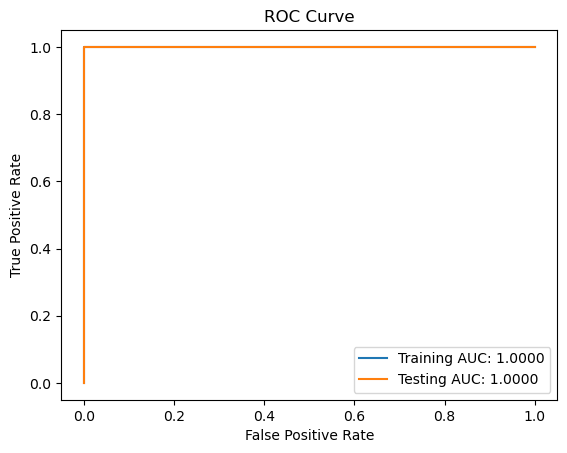

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_auc_train_test(model, X_train, X_test, y_train, y_test):
    # Predict probabilities
    y_train_pred_prob = model.predict_proba(X_train)[:, 1]
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
    
    auc_train = auc(fpr_train, tpr_train)
    auc_test = auc(fpr_test, tpr_test)
    
    plt.figure()
    plt.plot(fpr_train, tpr_train, label=f'Training AUC: {auc_train:.4f}')
    plt.plot(fpr_test, tpr_test, label=f'Testing AUC: {auc_test:.4f}')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="best")
    plt.show()

plot_roc_auc_train_test(dt_classifier, X_train, X_test, y_train, y_test)
